In [1]:
import sys
sys.path.append("/home/user122b/few-shot-learning")
from data_utils import *

In [2]:
import os
a = os.listdir("/home/user122b/few-shot-learning/data")
for item in a:
    print(f"'{item}' :", f'load_{item}(),')


'ethos-national_origin' : load_ethos-national_origin(),
'ethos-binary' : load_ethos-binary(),
'sick' : load_sick(),
'mr' : load_mr(),
'poem-sentiment' : load_poem-sentiment(),
'loading_dataset.ipynb' : load_loading_dataset.ipynb(),
'trec' : load_trec(),
'subj' : load_subj(),
'rte' : load_rte(),
'dbpedia' : load_dbpedia(),
'ethos-race' : load_ethos-race(),
'tweet-stance_atheism' : load_tweet-stance_atheism(),
'cb' : load_cb(),
'cr' : load_cr(),
'slot-movies' : load_slot-movies(),
'agnews' : load_agnews(),
'sst2' : load_sst2(),
'tweet-stance_feminist' : load_tweet-stance_feminist(),
'wnli' : load_wnli(),
'lama' : load_lama(),
'tweet-irony' : load_tweet-irony(),
'tweet-offensive' : load_tweet-offensive(),
'atis' : load_atis(),
'financial-phrasebank' : load_financial-phrasebank(),
'ethos-religion' : load_ethos-religion(),
'hate-speech18' : load_hate-speech18(),
'tweet-hate' : load_tweet-hate(),


In [21]:
import pandas as pd
import nltk
import collections
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_top_words(texts, top_k):
    # Flatten list of texts and split into individual words
    words = [word for text in texts for word in text.split()]
    # Filter out stopwords
    words = [word for word in words if word not in stop_words]
    # Count frequency of each word
    word_count = collections.Counter(words)
    # Get the top K words
    top_words = [word for word, _ in word_count.most_common(top_k)]
    return set(top_words)

# Load the datasets
# Note: Replace 'load_dataset' with the actual function to load each dataset
datasets = {
    'ethos-national_origin' : load_ethos_national_origin()[:2],
    'ethos-binary' : load_ethos_binary()[:2],
    'mr' : load_mr()[:2],
    'poem-sentiment' : load_poem_sentiment()[:2],
    'trec' : load_trec()[:2],
    'subj' : load_subj()[:2],
    'rte' : load_rte()[:2],
    'dbpedia' : load_dbpedia()[:2],
    'ethos-race' : load_ethos_race()[:2],
    'tweet-stance_atheism' : load_tweet_atheism()[:2],
    'cb' : get_cb()[:2],
    'cr' : load_cr()[:2],
    'agnews' : load_agnews()[:2],
    'tweet-stance_feminist' : load_tweet_feminist()[:2],
    'sst2' : load_sst2()[:2],
    'wnli' : load_wnli()[:2],
    'tweet-irony' : load_tweet_irony()[:2],
    'tweet-offensive' : load_tweet_offensive()[:2],
    'financial-phrasebank' : load_financial_phrasebank()[:2],
    'ethos-religion' : load_ethos_religion()[:2],
    'hate-speech18' : load_hate_speech18()[:2],
    'tweet-hate' : load_tweet_hate()[:2],
}

# Get the top 10K words from each dataset
top_words = {name: get_top_words(sentences, 10000) for name, (sentences, labels) in datasets.items()}

# Calculate vocabulary overlap between datasets
overlap = pd.DataFrame(index=datasets.keys(), columns=datasets.keys())
for name1, words1 in top_words.items():
    for name2, words2 in top_words.items():
        overlap.loc[name1, name2] = len(words1 & words2) / len(words1 | words2)

print(overlap)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/user122b/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                      ethos-national_origin ethos-binary        mr  \
ethos-national_origin                   1.0     0.431308  0.062005   
ethos-binary                       0.431308          1.0  0.101731   
mr                                 0.062005     0.101731       1.0   
poem-sentiment                     0.065741     0.073353  0.066927   
trec                               0.051264      0.07776  0.111667   
subj                               0.065853     0.107978   0.49421   
rte                                0.066702     0.105106  0.144689   
dbpedia                            0.054759     0.082654  0.129816   
ethos-race                         0.750633     0.433993    0.0636   
tweet-stance_atheism               0.108365      0.11761  0.069108   
cb                                 0.108575     0.133558  0.100446   
cr                                 0.080814     0.114159  0.200418   
agnews                             0.070775     0.108415  0.155535   
tweet-stance_feminis

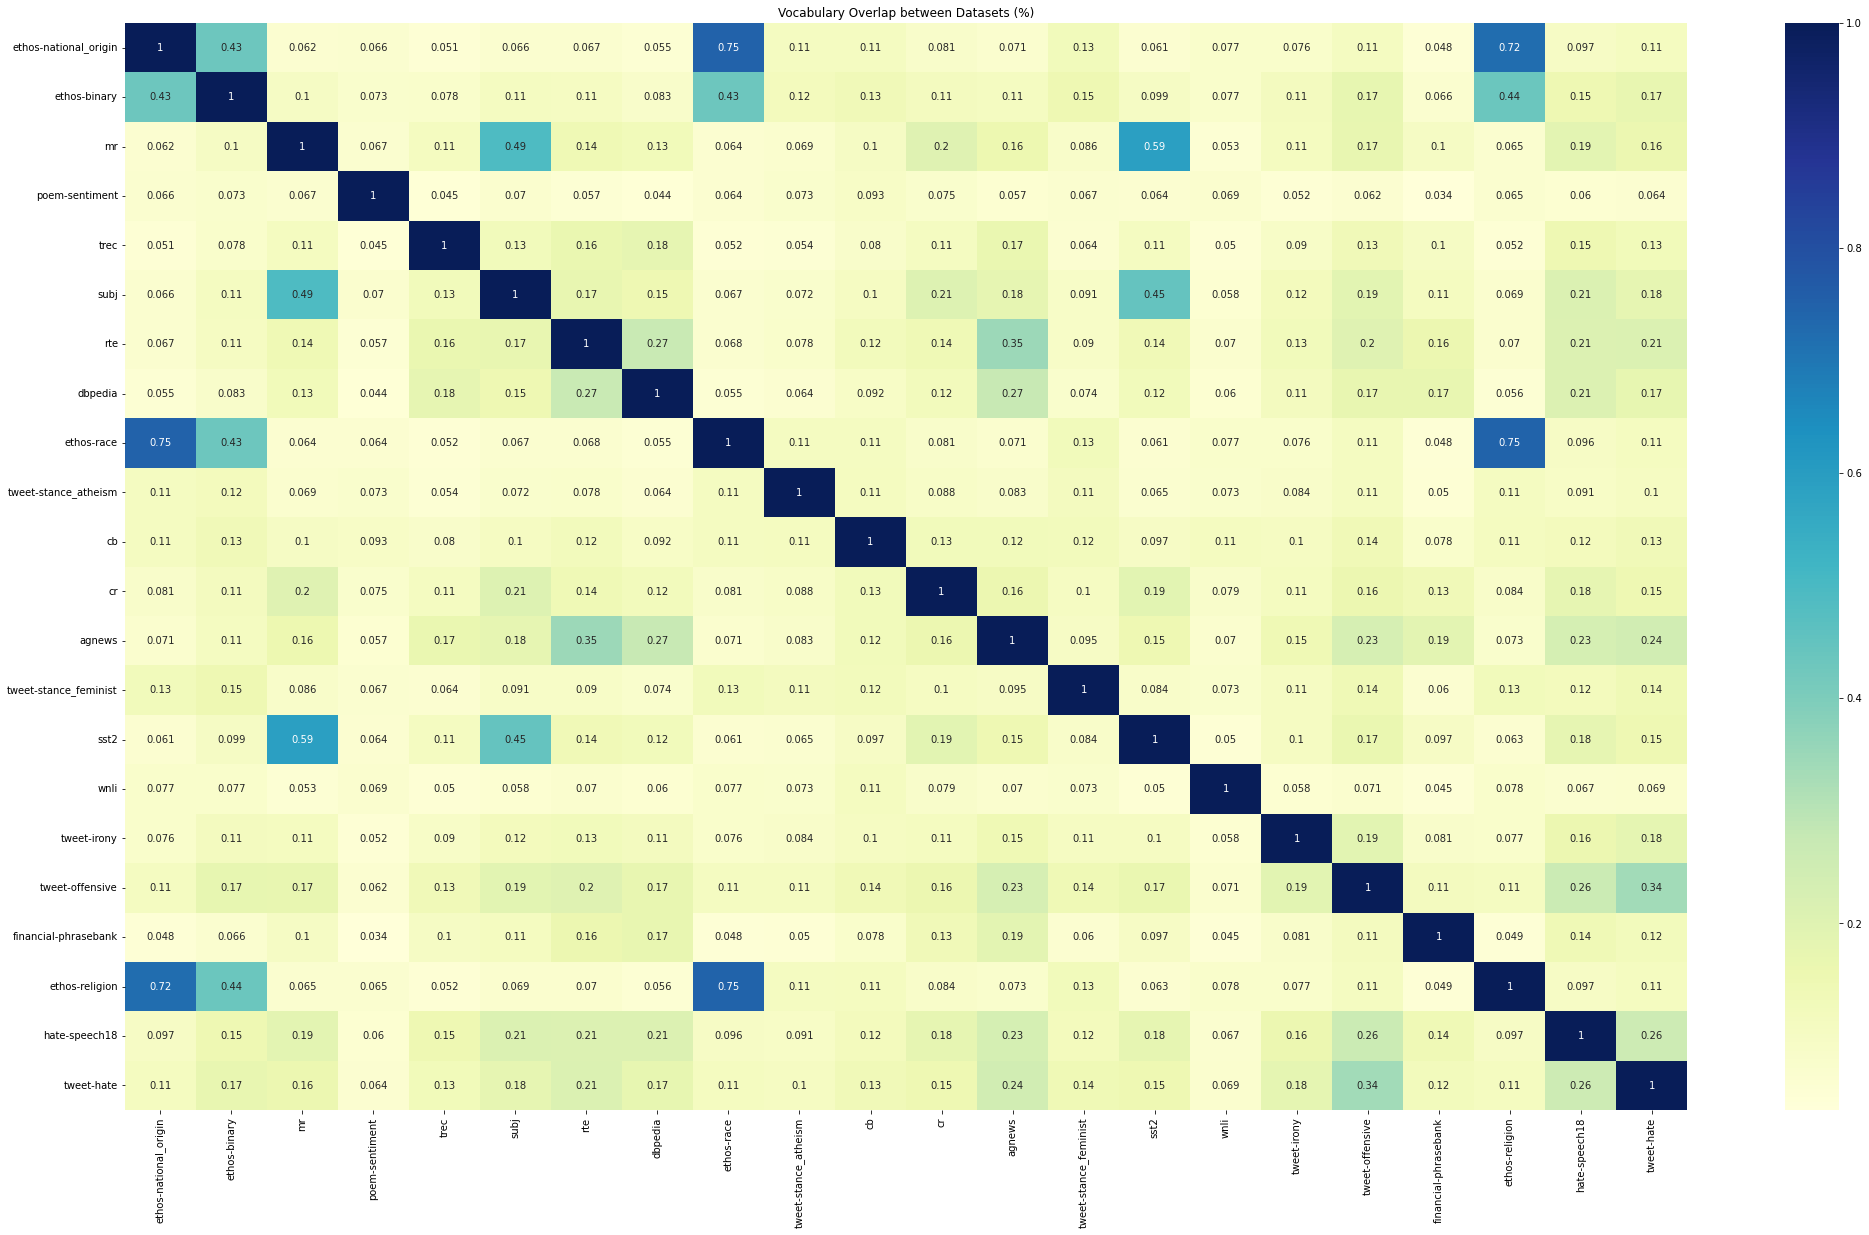

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

overlap = overlap.applymap(pd.to_numeric, errors='coerce')

plt.figure(figsize=(35, 20)) 
sns.heatmap(overlap, annot=True, cmap='YlGnBu')
plt.title("Vocabulary Overlap between Datasets (%)")
plt.show()

In [26]:
overlap.nlargest(3, 'hate-speech18')

,ethos-national_origin,ethos-binary,mr,poem-sentiment,trec,subj,rte,dbpedia,ethos-race,tweet-stance_atheism,...,agnews,tweet-stance_feminist,sst2,wnli,tweet-irony,tweet-offensive,financial-phrasebank,ethos-religion,hate-speech18,tweet-hate
hate-speech18,0.096581,0.147565,0.186662,0.060345,0.149954,0.212048,0.207657,0.209995,0.096391,0.091338,...,0.232742,0.118585,0.178481,0.066667,0.159219,0.261830,0.143117,0.097101,1.000000,0.258336
tweet-offensive,0.106340,0.174389,0.172952,0.061601,0.132375,0.190264,0.201706,0.172127,0.107843,0.106899,...,0.230164,0.141700,0.165501,0.071012,0.189697,1.000000,0.114177,0.108447,0.261830,0.336184
tweet-hate,0.110109,0.172040,0.159084,0.064122,0.129880,0.179106,0.213961,0.173916,0.109775,0.104165,...,0.243781,0.141123,0.150351,0.069032,0.182662,0.336184,0.121131,0.111499,0.258336,1.000000


In [25]:
overlap['hate-speech18']

ethos-national_origin    0.096581
ethos-binary             0.147565
mr                       0.186662
poem-sentiment           0.060345
trec                     0.149954
subj                     0.212048
rte                      0.207657
dbpedia                  0.209995
ethos-race               0.096391
tweet-stance_atheism     0.091338
cb                       0.120138
cr                       0.177629
agnews                   0.232742
tweet-stance_feminist    0.118585
sst2                     0.178481
wnli                     0.066667
tweet-irony              0.159219
tweet-offensive          0.261830
financial-phrasebank     0.143117
ethos-religion           0.097101
hate-speech18            1.000000
tweet-hate               0.258336
Name: hate-speech18, dtype: float64